## Anki


Parei na parte 5: Lost and Found

In [36]:
%load_ext autoreload 
%autoreload 2

In [37]:
import os
os.chdir("..")
os.chdir("..")
os.chdir("..")

In [ ]:
from app.utils.toolkit import read_json
import random


WORD_FILE = "database/vocabulary_json/describing_things/adjectives.json"

data = read_json(WORD_FILE)


word = random.choice(list(data.keys())).upper()


word_answer = data.pop(c.lower())

In [48]:
word, word_answer

('LONGO', 'long')

In [3]:
from app.model.vocabulary_model import VocabularyModel
# from app.games.vocabulary_game.view.vocabulary_view import ControladorDePaginas
from app.games.vocabulary_game.controller.vocabulary_controller import VocabularyController

import tkinter as tk
import tkinter as tk
from PIL import Image, ImageTk
from tkinter import ttk, messagebox


#### Melhorias 

- Pontuação
- Armazenar palavras aprendidas
    - Saber quais palavras tenho facilidade
    - Saber quais palavras tenho mais dificuldade 

- Cirar função para caregar as palavras usasas nos desafios


- Coletar dados de palavras do Duolingo
    - https://duome.eu/tips/pt/en
    - https://duome.eu/stories/pt/en


---

- Como pontuar a difficulty

difficulty = quanto maior mais dificil (0 a 100)

---

{"word", "is_correct", , "difficulty", "game"}

In [ ]:
class ScoreManager:
    """Gerenciador de pontuações e estatísticas de dificuldade."""
    
    def __init__(self):
        self.scores = 0
        self.word_stats = {}  # Ex.: {"word": {"correct": 0, "incorrect": 0}}

    def add_points(self, points: int):
        """Adiciona pontos ao total."""
        self.scores += points

    def deduct_points(self, points: int):
        """Deduz pontos do total."""
        self.scores -= points

    def register_word(self, word: str, correct: bool):
        """Atualiza estatísticas de palavras."""
        if word not in self.word_stats:
            self.word_stats[word] = {"correct": 0, "incorrect": 0}
        
        if correct:
            self.word_stats[word]["correct"] += 1
        else:
            self.word_stats[word]["incorrect"] += 1

    def get_word_difficulty(self, word: str):
        """Calcula a dificuldade da palavra com base nas tentativas."""
        if word not in self.word_stats:
            return None
        
        stats = self.word_stats[word]
        total_attempts = stats["correct"] + stats["incorrect"]
        if total_attempts == 0:
            return 0
        return stats["incorrect"] / total_attempts  # Percentual de erros

    def get_total_score(self):
        """Retorna a pontuação total."""
        return self.scores

    def get_difficulty_summary(self):
        """Retorna um resumo de palavras mais difíceis/fáceis."""
        sorted_words = sorted(
            self.word_stats.items(),
            key=lambda x: self.get_word_difficulty(x[0]),
            reverse=True
        )
        return sorted_words


In [ ]:
score = ScoreManager()

score

In [34]:
(6 - 5) #/ 6

1

In [53]:
import pandas as pd

pd.read_csv("database/infos/game.csv")

,word,won,difficulty,game


In [1]:
{"word":"teste", "is_correct":True, "difficulty":0, "game":"game_teste"}

{'word': 'teste', 'is_correct': True, 'difficulty': 0, 'game': 'game_teste'}

In [54]:
from app.main import PageController

app = PageController()
app.mainloop()

# python -m app.main

# python -m app.games.hangman_game.main

[DEBUG] Categoria selecionada: fruits
[DEBUG] Subcategorias retornadas: ['temperate', 'tropical']


In [7]:
end

NameError: name 'end' is not defined

In [ ]:
# # # Inicializa o jogo
# if __name__ == "__main__":
#     root = tk.Tk()
#     root.title("Vocabulary Game")
#     game = VocabularyGame(root)
#     game.pack(expand=True, fill='both')
#     root.geometry("375x350")
#     root.mainloop()

In [ ]:
import tkinter as tk
from tkinter import ttk
from app.games.vocabulary_game.main import VocabularyGame


class VocabularyGameView(tk.Frame):
    """Tela do Jogo de Vocabulário com estatísticas estilizadas no cantinho."""

    def __init__(self, parent, controller=None, **kwargs):
        super().__init__(parent, **kwargs)

        # Divisão da interface em dois frames
        self.game_frame = tk.Frame(self, bg="#ffffff")  # Área do jogo com fundo branco
        self.stats_frame = tk.Frame(self, bg="#2c3e50", width=220, relief="raised", bd=2)  # Estatísticas com bordas

        self.stats_frame.pack(side="left", fill="y", padx=5, pady=5)  # Estatísticas na lateral direita
        self.game_frame.pack(side="right", fill="both", expand=True, padx=5, pady=5)  # Espaçamento para o frame do jogo

        # Estatísticas
        self.stats = {"Pontuação": 0, "Palavras Faltantes": 10}
        self.create_stats_view()

        # Adiciona o jogo ao frame principal
        self.game_instance = VocabularyGame(self.game_frame)
        self.game_instance.pack(expand=True, fill="both")

    def create_stats_view(self):
        """Cria a área de exibição de estatísticas."""
        # Título das estatísticas
        title_label = tk.Label(
            self.stats_frame, text="Estatísticas", font=("Helvetica", 16, "bold"),
            bg="#34495e", fg="#ecf0f1", pady=10
        )
        title_label.pack(fill="x")

        # Exibição das estatísticas em labels
        self.stat_labels = {}
        for metric in self.stats.keys():
            frame = tk.Frame(self.stats_frame, bg="#2c3e50")
            frame.pack(fill="x", padx=10, pady=5)

            metric_label = tk.Label(
                frame, text=metric, font=("Helvetica", 12, "bold"),
                bg="#2c3e50", fg="#ecf0f1"
            )
            metric_label.pack(side="left")

            value_label = tk.Label(
                frame, text=str(self.stats[metric]), font=("Helvetica", 12),
                bg="#2c3e50", fg="#1abc9c"
            )
            value_label.pack(side="right")

            self.stat_labels[metric] = value_label

        # Botão para atualizar estatísticas
        update_button = tk.Button(
            self.stats_frame, text="Atualizar", command=self.update_stats,
            font=("Helvetica", 10, "bold"), bg="#1abc9c", fg="#ffffff", bd=0,
            activebackground="#16a085", activeforeground="#ecf0f1"
        )
        update_button.pack(pady=15, ipadx=10, ipady=5)

    def update_stats(self):
        """Atualiza as estatísticas (exemplo funcionalidade)."""
        self.stats["Pontuação"] += 10
        self.stats["Palavras Faltantes"] = max(0, self.stats["Palavras Faltantes"] - 1)  # Evita número negativo

        # Atualiza os valores na interface
        for metric, value in self.stats.items():
            self.stat_labels[metric].config(text=str(value))


# Executar o jogo
if __name__ == "__main__":
    root = tk.Tk()
    root.title("Vocabulary Game")
    game = VocabularyGameView(root)
    game.pack(expand=True, fill='both')
    root.geometry("700x500")
    root.mainloop()

: 

In [ ]:
!pip install language_tool_python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 631.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 378.4 kB/s eta 0:00:000:00:01


In [14]:
import tkinter as tk
from tkinter import messagebox

def show_message():
    """Exibe uma mensagem ao clicar no botão."""
    messagebox.showerror("Mensagem", "Olá! Seja bem-vindo ao Tkinter!")

# Cria a janela principal
root = tk.Tk()
root.title("Exemplo Tkinter")
root.geometry("300x150")  # Define o tamanho da janela

# Adiciona um botão
button = tk.Button(root, text="Clique aqui", command=show_message)
button.pack(pady=20)  # Adiciona um espaço vertical ao redor do botão

# Inicia o loop principal da aplicação
root.mainloop()

In [ ]:
texto = "teste wdw    "

for i in texto.split():
    print(i)

teste
wdw


In [ ]:
"rfff" in  word_list

False

In [ ]:
content = "i have a test dfrr"

for word in content.split():
    res = check_spelling(word, word_list)
    print(f"word: {word}, res: {res}")

[word for word in content.split() if not check_spelling(word, word_list)]

word: i, res: True
word: have, res: True
word: a, res: True
word: test, res: True
word: dfrr, res: False


['dfrr']

In [ ]:
import language_tool_python

def corrigir_texto_automatico(texto):
    tool = language_tool_python.LanguageTool('en-US')  # Inglês americano
    matches = tool.check(texto)
    texto_corrigido = language_tool_python.utils.correct(texto, matches)
    return texto_corrigido

# Exemplo de uso
texto_usuario = "in the moring i listen to the radio and sleep, in the night i cook dinner to me end feed the cat, in the other day e catch the bus to work end end day i have a break"
texto_corrigido = corrigir_texto_automatico(texto_usuario)

print("Texto corrigido:")
print(texto_corrigido)


Texto corrigido:
In the moving I listen to the radio and sleep, in the night I cook dinner to me end feed the cat, in the other day e catch the bus to work end day I have a break


In [ ]:
import tkinter as tk






In [ ]:
def teste(**kwargs):
    print(kwargs)

teste(**{"teste":"ok"})

{'teste': 'ok'}


In [ ]:
from PIL import Image, ImageTk


imagem_pil = Image.open("database/images/time_expressions\monday.png")

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Concremat\AppData\Local\Temp\ipykernel_33308\3254433291.py:4: SyntaxWarning: invalid escape sequence '\m'
  imagem_pil = Image.open("database/images/time_expressions\monday.png")


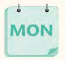

In [ ]:
imagem_pil

----

In [ ]:
import tkinter as tk
from PIL import Image, ImageTk
from tkinter import ttk, messagebox
from app.vocabulary_builder.controller.vocabulary_controller import VocabularyController


class VocabularyGame(tk.Frame):
    def __init__(self, parent=None, **kwargs):
        tk.Frame.__init__(self, parent, **kwargs)
        self.controller = kwargs["controller"]

        # Widgets da tela de seleção
        self.label_selection_title = tk.Label(self, text="Seleção do Tipo de Jogo", font=("Arial", 16))
        self.centralizar_widget(self.label_selection_title, 0.1)

        self.label_category = tk.Label(self, text="Escolha uma categoria:", font=("Arial", 14))
        self.centralizar_widget(self.label_category, 0.2)

        self.category_combobox = ttk.Combobox(self, state="readonly")
        self.centralizar_widget(self.category_combobox, 0.3)
        self.category_combobox["values"] = self.controller.vocabulary_model.list_categories()
        self.category_combobox.bind("<<ComboboxSelected>>", self.populate_subcategories)

        self.label_subcategory = tk.Label(self, text="Escolha uma subcategoria:", font=("Arial", 14))
        self.centralizar_widget(self.label_subcategory, 0.4)

        self.subcategory_combobox = ttk.Combobox(self, state="readonly")
        self.centralizar_widget(self.subcategory_combobox, 0.5)
        self.subcategory_combobox["state"] = "disabled"
        self.subcategory_combobox.bind("<<ComboboxSelected>>", self.enable_start_button)

        self.start_button = tk.Button(self, text="Iniciar Jogo", command=self.start_game, font=("Arial", 12), state="disabled")
        self.centralizar_widget(self.start_button, 0.7)

        # Widgets da tela de jogo
        self.label_game_info = tk.Label(self, text="", font=("Arial", 14))
        self.centralizar_widget(self.label_game_info, 0.1)
        self.label_image = tk.Label(self)
        self.centralizar_widget(self.label_image, 0.25)
        self.displayed_image_tk = None
        self.word_label = tk.Label(self, text="", font=("Arial", 18, "bold"))
        self.centralizar_widget(self.word_label, 0.4)
        self.answer_entry = ttk.Entry(self, font=("Arial", 14))
        self.centralizar_widget(self.answer_entry, 0.5)
        self.feedback_label = ttk.Label(self, text="", font=("Arial", 12))
        self.centralizar_widget(self.feedback_label, 0.6)
        self.botao_confirmar = tk.Button(self, text="Confirmar", command=self.check_answer)
        self.botao_confirmar.place(relx=0.65, rely=0.7, anchor=tk.CENTER)
        self.botao_voltar_inicial = tk.Button(self, text="Voltar para Seleção", command=self.show_selection_page)
        self.botao_voltar_inicial.place(relx=0.35, rely=0.7, anchor=tk.CENTER)

        self.category = None
        self.subcategory = None
        self.game_widgets_visible(False) # Inicialmente esconde os widgets do jogo

    def centralizar_widget(self, widget, rely):
        widget.place(relx=0.5, rely=rely, anchor=tk.CENTER)

    def populate_subcategories(self, event):
        category = self.category_combobox.get()
        subcategories = self.controller.vocabulary_model.list_subcategories(category)
        self.subcategory_combobox["values"] = subcategories
        self.subcategory_combobox["state"] = "readonly" if subcategories else "disabled"
        self.subcategory_combobox.set("")
        self.start_button["state"] = "disabled"

    def enable_start_button(self, event):
        if self.subcategory_combobox.get():
            self.start_button["state"] = "normal"
        else:
            self.start_button["state"] = "disabled"

    def start_game(self):
        selected_category = self.category_combobox.get()
        selected_subcategory = self.subcategory_combobox.get()
        if selected_category and selected_subcategory:
            print(f"Jogo iniciado com categoria: {selected_category}, subcategoria: {selected_subcategory}")
            self.category = selected_category
            self.subcategory = selected_subcategory
            self.load_game_content(selected_category, selected_subcategory)
            self.selection_widgets_visible(False)
            self.game_widgets_visible(True)
            self.controller.vocabulary_controller.start_quiz(selected_category, selected_subcategory)
        else:
            messagebox.showinfo("Seleção Inválida", "Por favor, escolha uma categoria e subcategoria.")

    def load_game_content(self, category, subcategory):
        self.label_game_info.config(text=f"Vocabulário - Categoria: {category}, Subcategoria: {subcategory}")
        self.controller.vocabulary_controller.view = self
        self.next_word()

    def display_word(self, word):
        self.word_label.config(text=word)
        self.answer_entry.delete(0, tk.END)
        self.feedback_label.config(text="")

    def display_image(self, path_image):
        try:
            imagem_pil = Image.open(path_image)
            imagem_tk = ImageTk.PhotoImage(imagem_pil)
            self.label_image.config(image=imagem_tk)
            self.displayed_image_tk = imagem_tk
        except FileNotFoundError:
            print(f"Erro: Arquivo de imagem não encontrado em {path_image}")
            self.label_image.config(text="Imagem não encontrada")
        except Exception as e:
            print(f"Erro ao carregar a imagem: {e}")
            self.label_image.config(text=f"Erro ao carregar a imagem: {e}")

    def display_feedback(self, message, color):
        self.feedback_label.config(text=message, foreground=color)

    def check_answer(self):
        user_answer = self.answer_entry.get()
        self.controller.vocabulary_controller.check_answer(user_answer)

    def next_word(self):
        self.controller.vocabulary_controller.next_word()

    def show_selection_page(self):
        self.game_widgets_visible(False)
        self.selection_widgets_visible(True)
    
    def set_widgets_state(self, widgets, visible=True):
        state = tk.NORMAL if visible else tk.DISABLED
        for widget in widgets:
            widget.config(state=state)


    def selection_widgets_visible(self, visible=True):
        self.set_widgets_state([
            self.label_selection_title,
            self.label_category,
            self.category_combobox,
            self.label_subcategory,
            self.subcategory_combobox,
            self.start_button
        ], visible=visible)

    def game_widgets_visible(self, visible=True):
        self.set_widgets_state([
            self.label_game_info,
            self.label_image,
            self.word_label,
            self.answer_entry,
            self.feedback_label,
            self.botao_confirmar,
            self.botao_voltar_inicial,
        ], visible=visible)

# # Inicializa o jogo
if __name__ == "__main__":
    root = tk.Tk()
    root.title("Hangman Game")
    game = VocabularyGame(root, controller=VocabularyController())
    game.pack(expand=True, fill='both')
    root.geometry("375x350")
    root.mainloop()


TypeError: VocabularyController.__init__() missing 2 required positional arguments: 'root' and 'model'

In [ ]:
controller=VocabularyController(root)

In [ ]:
import pandas as pd
import json
import os

def csv_to_json_vocabulary_single_row(root_csv_folder, output_json_folder):
    """
    Converte arquivos CSV de vocabulário (múltiplas colunas, uma única linha)
    em arquivos JSON, mantendo a estrutura de pastas. As chaves do JSON
    serão os nomes das colunas e os valores serão os valores da única linha.

    Args:
        root_csv_folder (str): Caminho para a pasta raiz contendo as categorias de CSVs.
        output_json_folder (str): Caminho para a pasta raiz onde os JSONs serão salvos.
    """
    if not os.path.exists(output_json_folder):
        os.makedirs(output_json_folder)

    for category_name in os.listdir(root_csv_folder):
        category_path = os.path.join(root_csv_folder, category_name)
        if os.path.isdir(category_path):
            output_category_path = os.path.join(output_json_folder, category_name)
            if not os.path.exists(output_category_path):
                os.makedirs(output_category_path)

            for csv_filename in os.listdir(category_path):
                if csv_filename.endswith(".csv"):
                    csv_filepath = os.path.join(category_path, csv_filename)
                    json_filename = os.path.splitext(csv_filename)[0] + ".json"
                    json_filepath = os.path.join(output_category_path, json_filename)

                    try:
                        df = pd.read_csv(csv_filepath)
                        if len(df) == 1:
                            data = df.iloc[0].to_dict()
                            with open(json_filepath, 'w', encoding='utf-8') as f:
                                json.dump(data, f, indent=4, ensure_ascii=False)
                            print(f"Convertido (linha única): {csv_filepath} -> {json_filepath}")
                        else:
                            print(f"Aviso: {csv_filepath} não possui exatamente uma linha. Ignorando.")
                    except Exception as e:
                        print(f"Erro ao processar {csv_filepath}: {e}")

if __name__ == "__main__":
    root_csv_folder = r"C:\pyprojects\fast-english\database\vocabulary"
    output_json_folder = r"C:\pyprojects\fast-english\database\vocabulary_json"
    csv_to_json_vocabulary_single_row(root_csv_folder, output_json_folder)
    print("Processo de conversão de CSV para JSON (linha única) concluído.")

Convertido (linha única): C:\pyprojects\fast-english\database\vocabulary\animals\birds.csv -> C:\pyprojects\fast-english\database\vocabulary_json\animals\birds.json
Convertido (linha única): C:\pyprojects\fast-english\database\vocabulary\animals\mammals.csv -> C:\pyprojects\fast-english\database\vocabulary_json\animals\mammals.json
Convertido (linha única): C:\pyprojects\fast-english\database\vocabulary\numbers\numbers_0-100.csv -> C:\pyprojects\fast-english\database\vocabulary_json\numbers\numbers_0-100.json
Convertido (linha única): C:\pyprojects\fast-english\database\vocabulary\numbers\ordinal_numbers_0-100.csv -> C:\pyprojects\fast-english\database\vocabulary_json\numbers\ordinal_numbers_0-100.json
Convertido (linha única): C:\pyprojects\fast-english\database\vocabulary\seasons_and_frequency\frequency.csv -> C:\pyprojects\fast-english\database\vocabulary_json\seasons_and_frequency\frequency.json
Convertido (linha única): C:\pyprojects\fast-english\database\vocabulary\seasons_and_fr

In [ ]:
"i {word} lunch at noon every day".format(word='???')
"she {word} lunch at 2pm every day".format(word='???')


'she ??? lunch at 2pm every day'

In [ ]:
import os
import csv
import pandas as pd

BASE_PATH = os.path.join("database", "vocabulary")

def carregar_csv(caminho_arquivo):
    dados = []
    with open(caminho_arquivo, newline='', encoding='utf-8') as csvfile:
        leitor = csv.DictReader(csvfile)
        for linha in leitor:
            dados.append(linha)
    return dados

def load_dataframe(caminho_arquivo:str):
    df = pd.read_csv(caminho_arquivo)
    return df.to_dict("records")[0]

def listar_funcionalidades(base_path=BASE_PATH):
    return [nome for nome in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, nome))]

def buscar_vocabulos(categoria):
    caminho = os.path.join(BASE_PATH, categoria)
    arquivos = os.listdir(caminho)
    vocabulario = []

    for arquivo in arquivos:
        if arquivo.endswith(".csv"):
            vocabulario.append(arquivo)

    return vocabulario

def exibir_vocabulario(categoria):
    vocab = buscar_vocabulos(categoria)
    return [item.replace(".csv", "") for item in vocab]
    #     # print(f"{item['pt']} ➜ {item['en']}")
        # print(f"{idx}- {item}")


def carregar_vocabulario(categoria, arquivo):
    caminho = os.path.join(BASE_PATH, categoria)
    # arquivos = os.listdir(caminho)
    caminho_csv = os.path.join(caminho, arquivo)
    # return carregar_csv(f"{caminho_csv}.csv")
    return load_dataframe(f"{caminho_csv}.csv")

# EXEMPLO DE USO
categorias = listar_funcionalidades()
print("Categorias disponíveis:", categorias)

print("\nVocabulário de 'days':")
exibir_vocabulario('seasons_and_frequency')

leitor = carregar_vocabulario(categoria="seasons_and_frequency", arquivo="frequency")



Categorias disponíveis: ['numbers', 'seasons_and_frequency', 'time_expressions']

Vocabulário de 'days':


In [ ]:


if __name__ == "__main__":
    # Criando uma estrutura de dados de exemplo (simulando seus arquivos JSON)
    if not os.path.exists("data/animals"):
        os.makedirs("data/animals")
    if not os.path.exists("data/fruits"):
        os.makedirs("data/fruits")

    with open("data/animals/mammals.json", 'w', encoding='utf-8') as f:
        json.dump({"dog": "cachorro", "cat": "gato", "elephant": "elefante"}, f, ensure_ascii=False, indent=4)
    with open("data/animals/birds.json", 'w', encoding='utf-8') as f:
        json.dump({"eagle": "águia", "parrot": "papagaio", "owl": "coruja"}, f, ensure_ascii=False, indent=4)
    with open("data/fruits/tropical.json", 'w', encoding='utf-8') as f:
        json.dump({"banana": "banana", "mango": "manga", "pineapple": "abacaxi"}, f, ensure_ascii=False, indent=4)
    with open("data/fruits/temperate.json", 'w', encoding='utf-8') as f:
        json.dump({"apple": "maçã", "pear": "pera", "strawberry": "morango"}, f, ensure_ascii=False, indent=4)

    root = tk.Tk()
    controller = VocabularyController(root)
    root.mainloop()

❌: maça, ✅: maçã
❌: pera, ✅: morango
❌: pinha, ✅: abacaxi
